In [ ]:
import mplfinance as mpf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
import mplfinance as mpf
import pandas as pd


df5trimmed = pd.read_csv('https://pastebin.com/raw/SgpargBb', index_col=0, parse_dates=True)
fig, axlist = mpf.plot(df5trimmed[0:30],
                       style='yahoo', 
                       figsize=(48,24), 
                       type='candle', 
                       volume=True, 
                       xrotation=0, 
                       tight_layout=True, 
                       returnfig=True,
                       show_nontrading=True)

# Display:
mpf.show()

In [ ]:
help(mpf.plot)

In [ ]:

df5trimmed = pd.read_csv('https://pastebin.com/raw/SgpargBb', index_col=0, parse_dates=True)
fig, axlist = mpf.plot(df5trimmed[0:30],
                       style='yahoo', 
                       figsize=(48,24), 
                       type='candle', 
                       volume=True, 
                       xrotation=0, 
                       tight_layout=True, 
                       returnfig=True,
                       show_nontrading=False)

# Display:
mpf.show()

In [ ]:
df5 = pd.read_csv('https://pastebin.com/raw/SgpargBb', index_col=0, parse_dates=True)

start_date = pd.to_datetime('2021-12-21 04:00').tz_localize('America/New_York')
end_date = pd.to_datetime('2021-12-21 19:55').tz_localize('America/New_York')


df5trimmed = df5.truncate(before=start_date, after=end_date)    
                    
ticks = pd.date_range(start_date, end_date, freq='15T')
ticklocations = [ df5trimmed.index.get_loc(tick) for tick in ticks ]
ticklabels = [ tick.time().strftime('%H:%M') for tick in ticks ]

# fig, axlist = mpf.plot(df5trimmed,style='yahoo', addplot=plotsToAdd, figsize=(48,24), 
#                        type='candlestick', volume=True, xrotation=0,
#                        tight_layout=True, returnfig=True)

# axlist[-2].xaxis.set_ticks(ticklocations)
# axlist[-2].set_xticklabels(ticklabels)

In [ ]:
df5trimmed

In [ ]:
df5

In [ ]:
import pytz
pytz.all_timezones

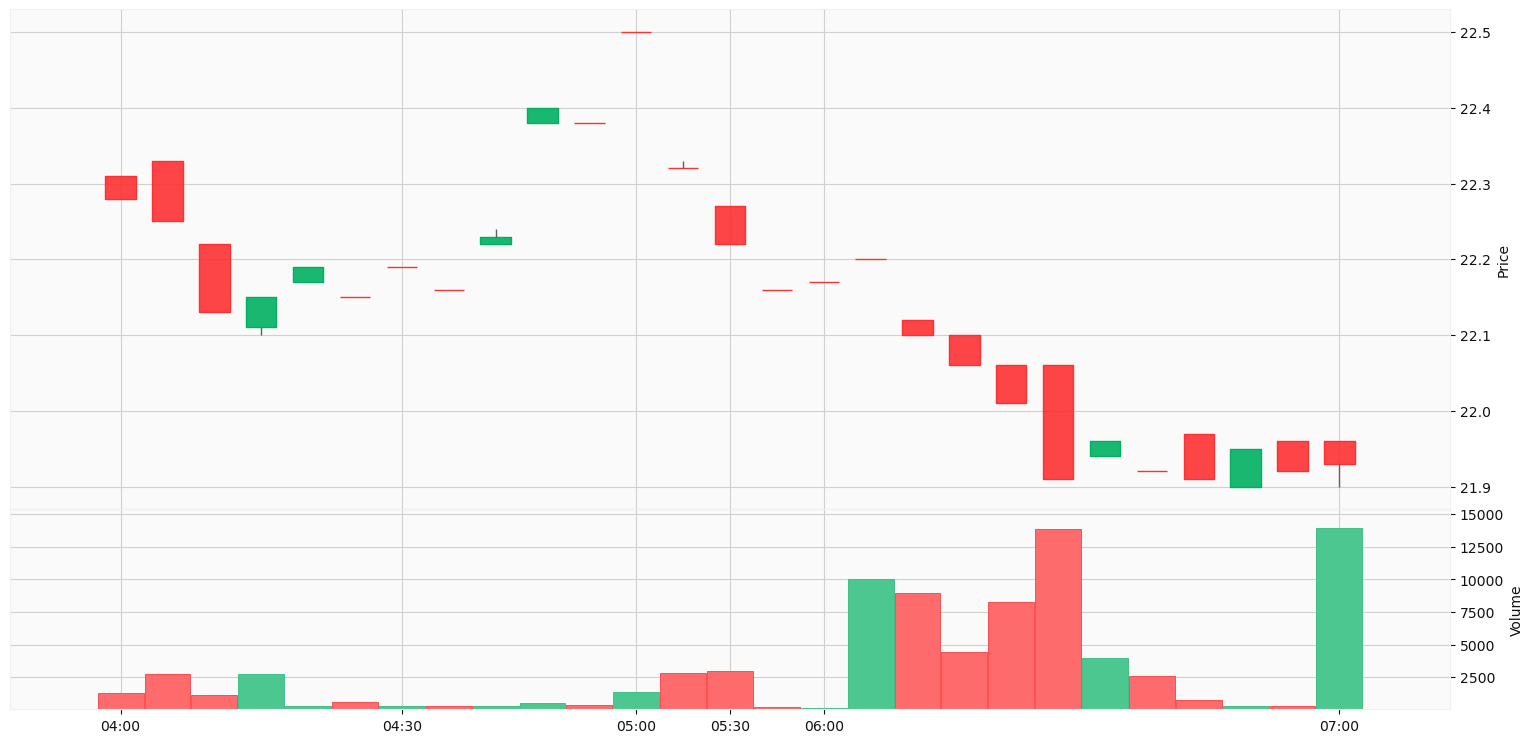

In [1]:
import mplfinance as mpf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# DATA PREPARATION
df5 = pd.read_csv('https://pastebin.com/raw/SgpargBb', index_col=0, parse_dates=True)
start_date = pd.to_datetime('2021-12-21 1:00').tz_localize('America/New_York')
end_date = pd.to_datetime('2021-12-21 7:00').tz_localize('America/New_York')
df5trimmed = df5.truncate(before=start_date, after=end_date)

# PLOTTING 
fig,  axlist= mpf.plot(df5trimmed,
                       style='yahoo', 
                       type='candlestick', 
                       volume=True, 
                       xrotation=0, 
                       figsize=(20,10), 
                       returnfig=True,
                       show_nontrading=False)

# x-tick labeling preparation
# the frequency can be ajusted but needs to be lower than original data
idx = pd.date_range(start_date, end_date, freq='30T', tz='America/New_York')
df_label_idx = pd.DataFrame(index=idx)

# this merge does the trick: the output is the intersection between the lower frequency and the 
# higher freq time series. The inner option leaves in the output only those rows present in both TS
# dropping from the lower freq TS those missing periods in the higher freq TS.
df_label = pd.merge(df_label_idx, df5trimmed, how='inner', left_index=True, right_index=True ).tz_convert('America/New_York')

# Tick labels are generated based on df_label
tick_labels = list(df_label.index.strftime('%H:%M'))
ticklocations = [df5trimmed.index.get_loc(tick) for tick in df_label.index ]

axlist[-2].xaxis.set_ticks(ticklocations)
axlist[-2].set_xticklabels(tick_labels)

mpf.show()



In [2]:
print(tick_labels)

['04:00', '04:30', '05:00', '05:30', '06:00', '07:00']


In [3]:
df_label

,Volume,Volume Weighted,Open,Close,High,Low,Time,Num Items
2021-12-21 04:00:00-05:00,1252.0,22.2910,22.31,22.28,22.31,22.28,1640077200000,4
2021-12-21 04:30:00-05:00,301.0,22.1900,22.19,22.19,22.19,22.19,1640079000000,2
2021-12-21 05:00:00-05:00,1370.0,22.5000,22.50,22.50,22.50,22.50,1640080800000,6
2021-12-21 05:30:00-05:00,3000.0,22.2310,22.27,22.22,22.27,22.22,1640082600000,11
2021-12-21 06:00:00-05:00,125.0,22.1700,22.17,22.17,22.17,22.17,1640084400000,1
2021-12-21 07:00:00-05:00,13979.0,21.9129,21.96,21.93,21.96,21.90,1640088000000,60


In [ ]:
df5trimmed['2021-12-21 05:00:00-05:00':'2021-12-21 07:00:00-05:00']